Implementar la función create_gauss_filter(h, w, k_size, sigma) para crear filtros gaussianos para 
filtrado espectral. Debe retornar un filtro gaussiano de tamaño HxW en dominio espacial y su transformada 
de Fourier.

1. Graficar ambas representaciones para diferentes tamaños de kernel y sigma. Aplicar el filtro una 
imagen para validar el funcionamiento en el dominio espectral. 
2. Usando el método descripto en el paper “Image Sharpness Measure for Blurred Images in Frequency 
Domain” comparar el resultado de un filtrado por convolución con el filtrado espectral.
3. Repetir la comparación usando uno de los métodos descriptos en el apéndice del paper “Analysis of 
focus measure operators in shape-from-focus”

In [1]:
#%matplotlib

import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

## Inciso 1

### Función create_gauss_filter

In [2]:
def create_gauss_filter(h, w, k_size=5, sigma=5):
    
    '''
    Devuelve kernel en dominio espacial y kernel en dominio espectral
    
    -------------------------------------------------------
    Parámetros:
    param h: alto de la imagen
    param w: ancho de la imagen
    param k_size: Tamaño del núcleo, positivo impar (3,5,...)
    param sigma:  Desvío estándar de la Gaussiana. Si no es positivo, se calcula como sigma = 0.3*((ksize-1)*0.5 - 1) + 0.8 
    '''

    # Creo el kernel 1d y a partir de el genero el kernel 2d
    kernel_1d = cv.getGaussianKernel(ksize=k_size, sigma=sigma) 
    kernel_2d = kernel_1d * kernel_1d.T

    # Hago el pad para completar el tamaño de la imagen con ceros
    h1 = np.floor((h - k_size)/2).astype(int)
    h2 = np.ceil((h - k_size)/2).astype(int)
    w1 = np.floor((w - k_size)/2).astype(int)
    w2 = np.ceil((w - k_size)/2).astype(int)
    kernel = np.pad(kernel_2d, ((h1,h2),(w1,w2)), 'constant')

    # Aplico la transformada
    kernel_ftt = np.fft.fft2(kernel)
    
    # llevo la baja frec al origen para acomodar la visualizacion
    # kernel_ftt = np.fft.fftshift(kernel_ftt)
    
    return kernel, kernel_ftt


-1

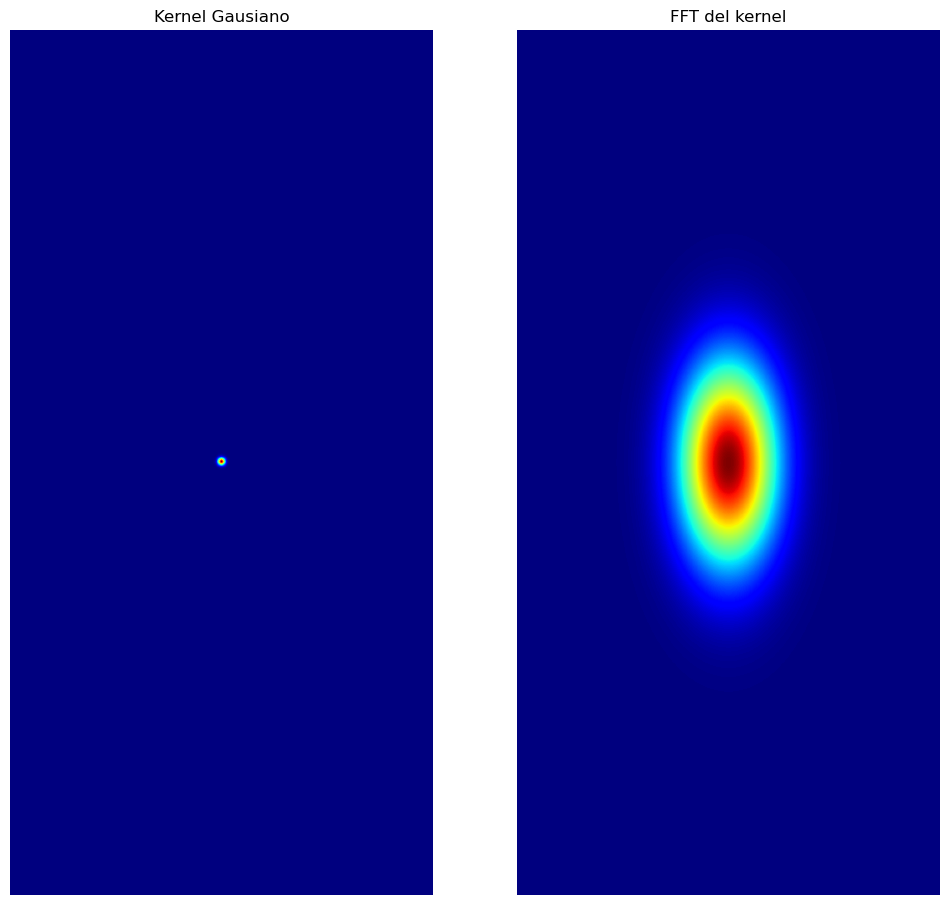

In [3]:
h = 698
w = 341

kernel, kernel_tf = create_gauss_filter(h, w, k_size=15, sigma=2)

plt.figure(figsize=(12,12))
plt.subplot(1,2,1)
plt.axis('off')
plt.title("Kernel Gausiano")
plt.imshow(kernel, cmap='jet')
plt.subplot(1,2,2)
plt.axis('off')
plt.title("FFT del kernel")
tf_shifted = np.fft.fftshift(kernel_tf)
plt.imshow(np.abs(tf_shifted), cmap='jet')

cv.waitKey(0)

### Grafico Kernels para distintos tamaños y sigmas

In [4]:
sizes = [3,7,11,15,19]
sigmas = np.arange(0.5,3,0.5)
print ('Tamaños:', sizes)
print('Sigmas:', sigmas)

Tamaños: [3, 7, 11, 15, 19]
Sigmas: [0.5 1.  1.5 2.  2.5]


In [5]:
kernels = []
kernels_tf = []

for i, size in enumerate(sizes):
    for j, sigma in enumerate(sigmas):
        kernel, kernel_tf = create_gauss_filter(h, w, k_size=size, sigma=sigma)
        kernels.append(kernel)
        kernels_tf.append(kernel_tf)
kernels = np.array(kernels).reshape(5,-1,h,w)
kernels_tf = np.array(kernels_tf).reshape(5,-1,h,w)

D:\Users\juanp_schamun\AppData\Local\Temp\ipykernel_13432\82846136.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(8,8))


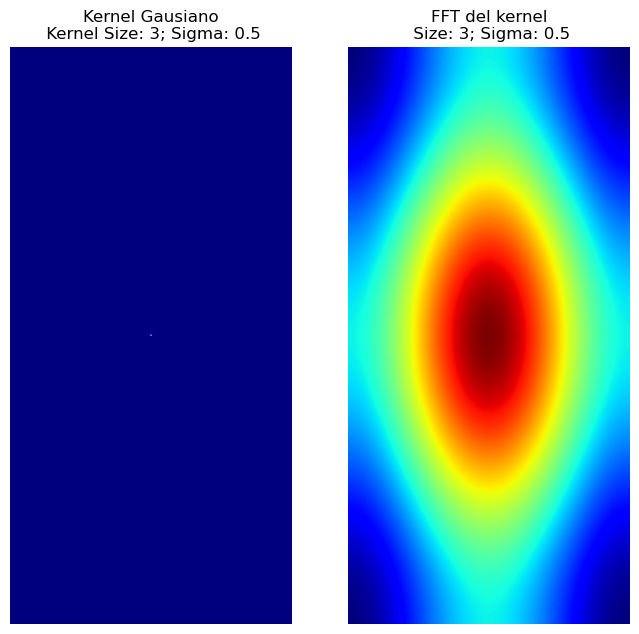

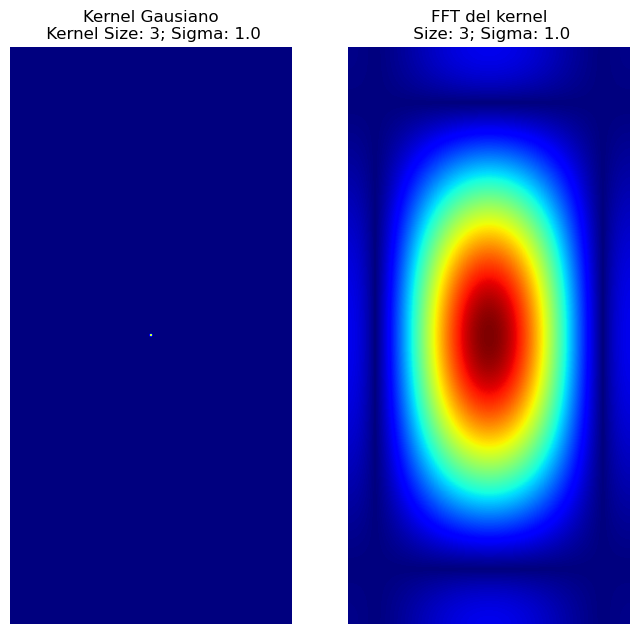

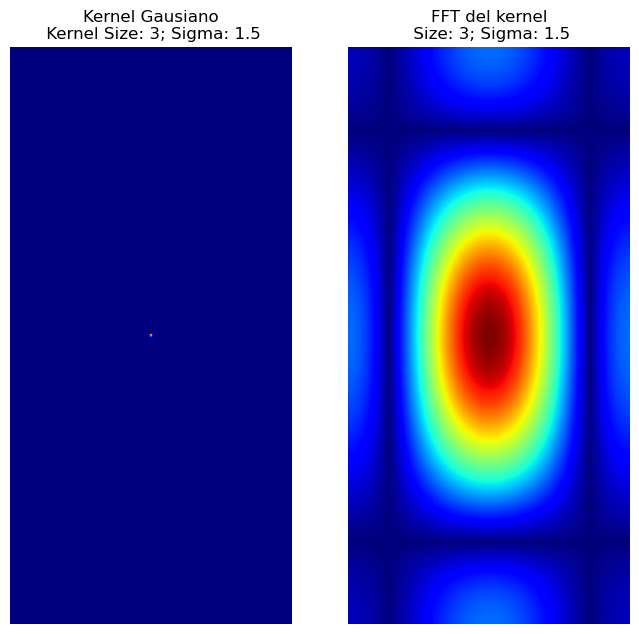

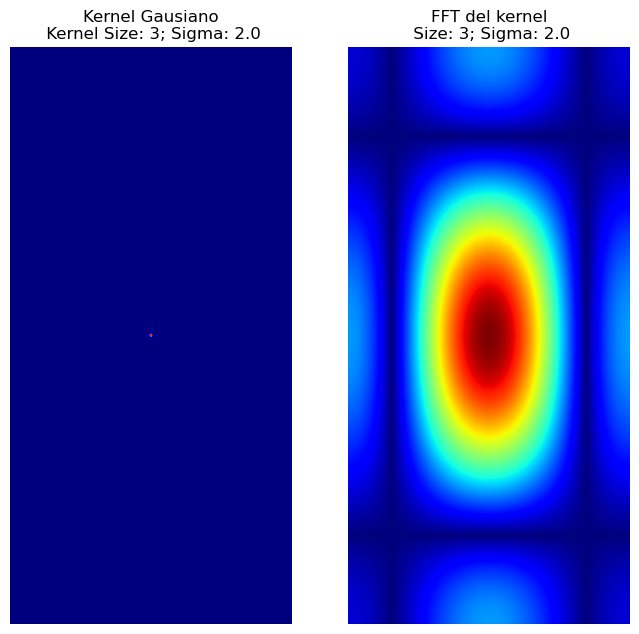

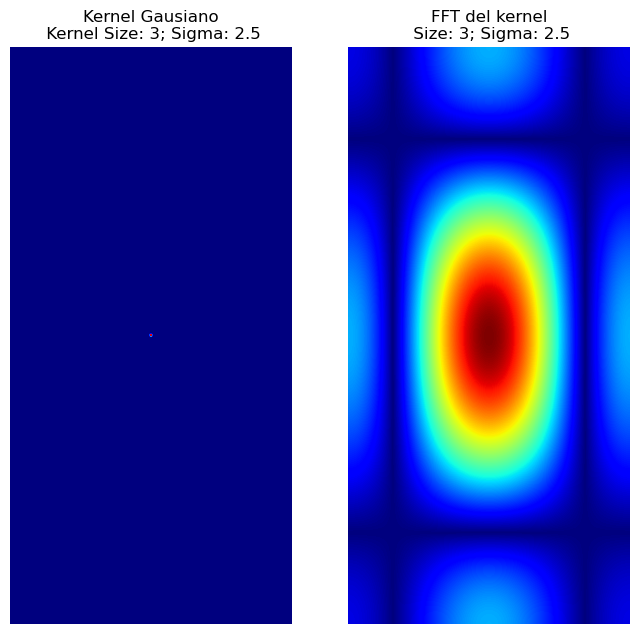

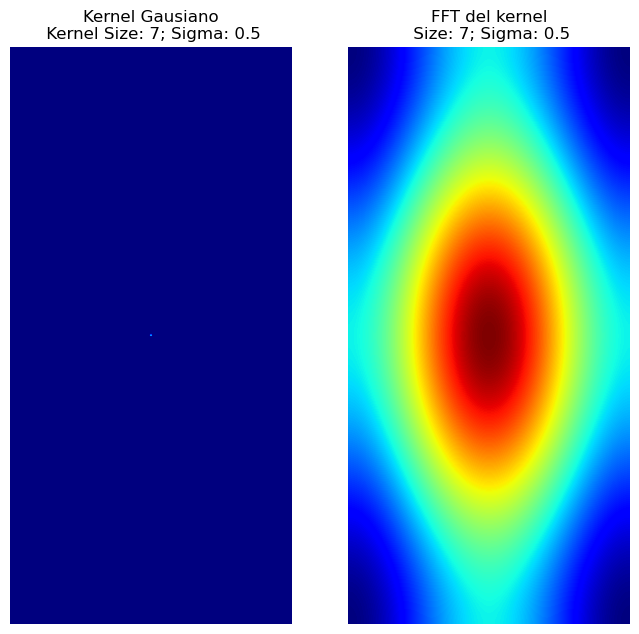

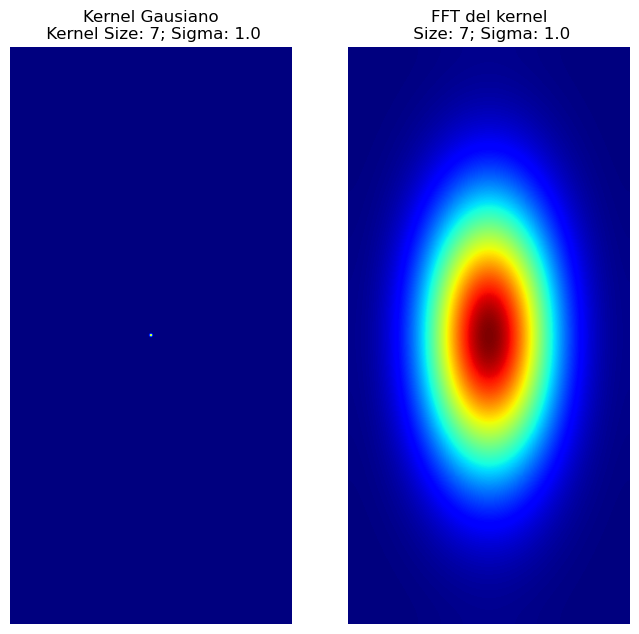

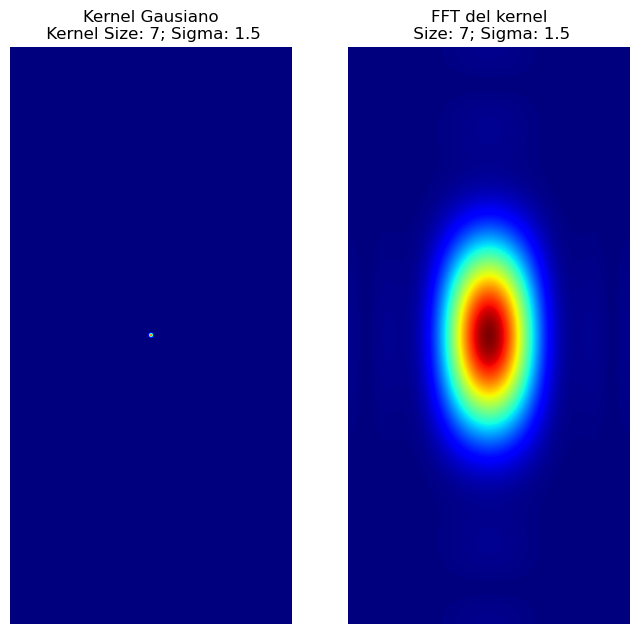

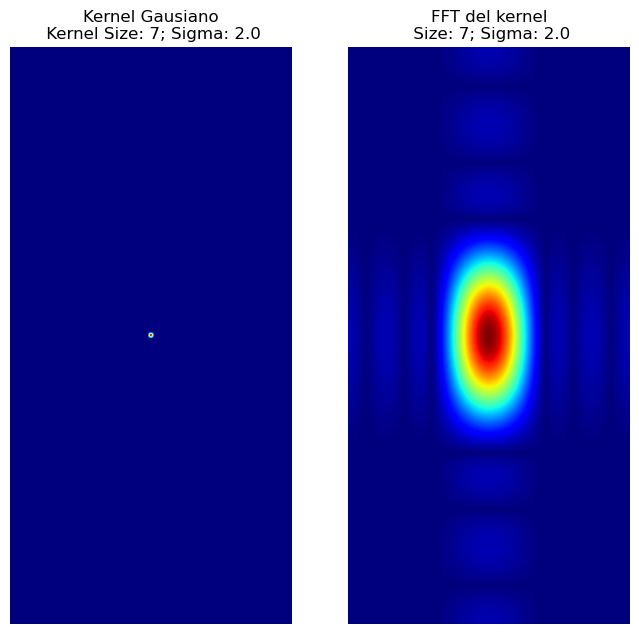

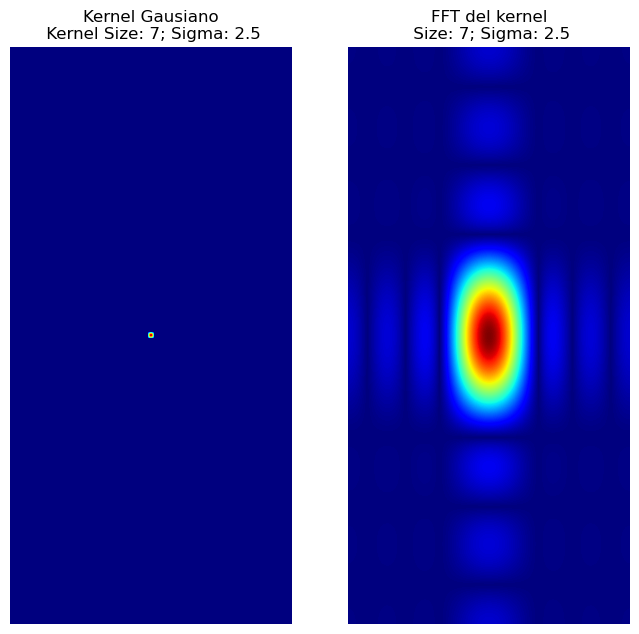

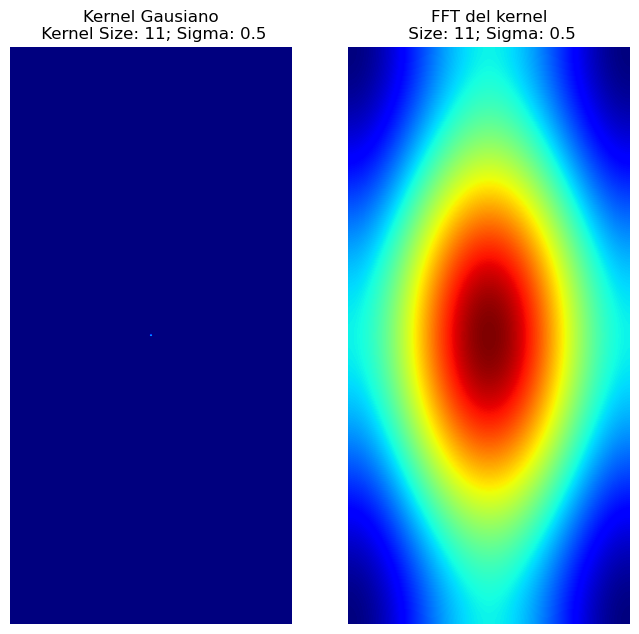

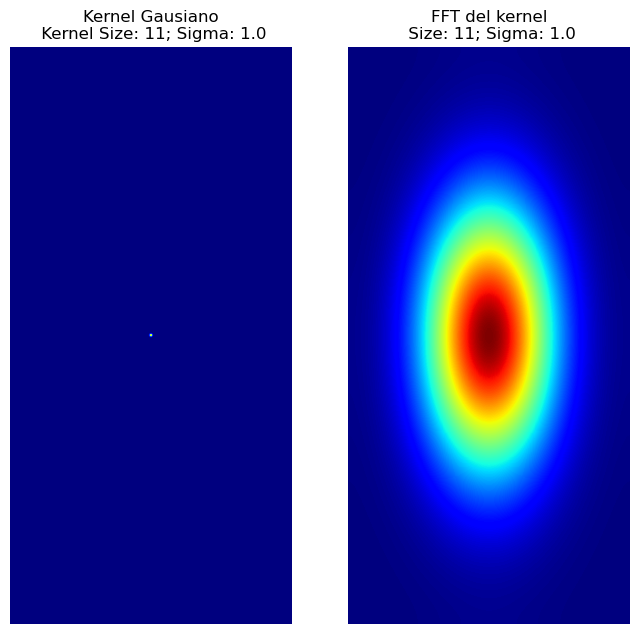

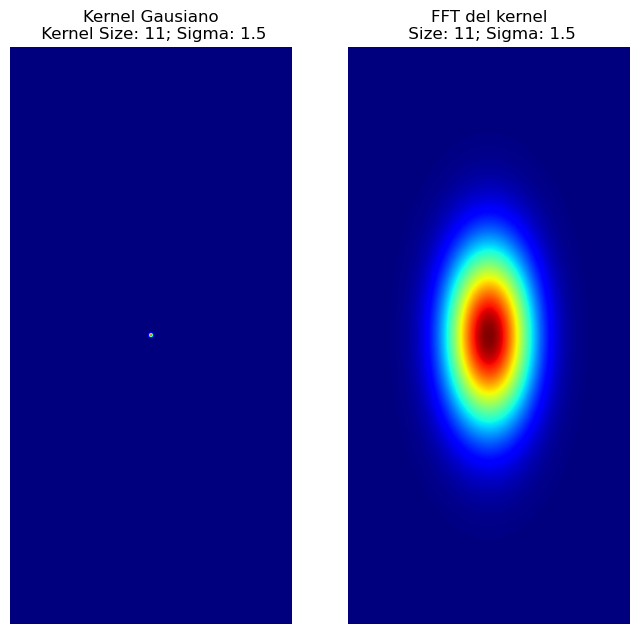

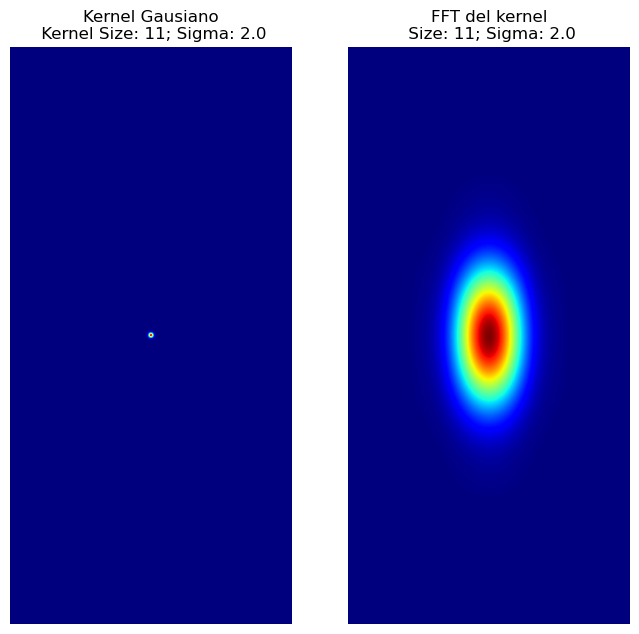

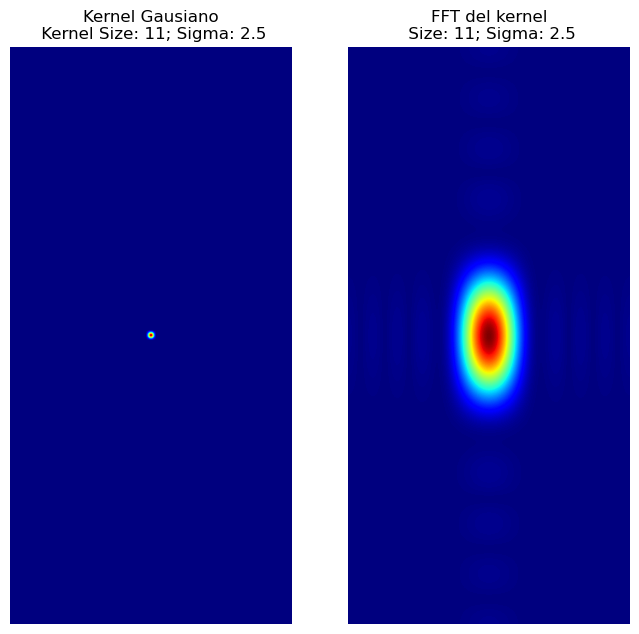

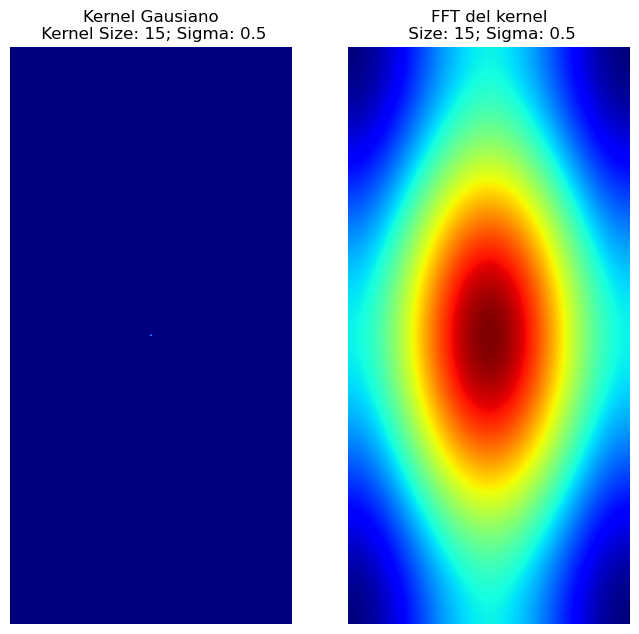

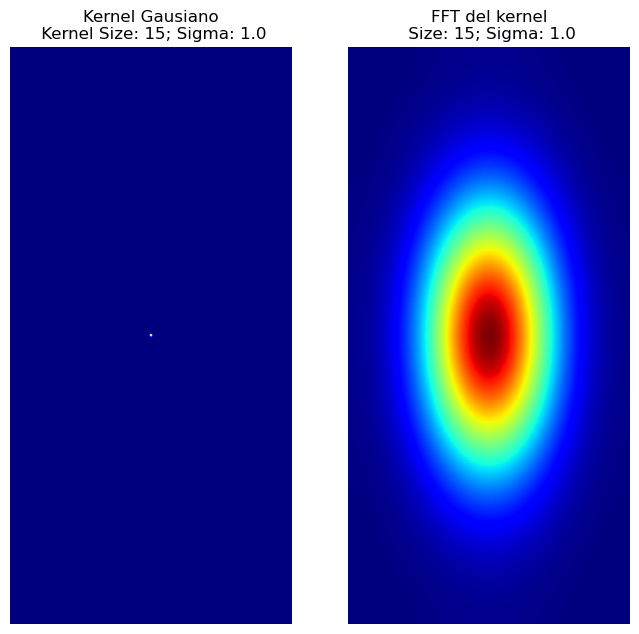

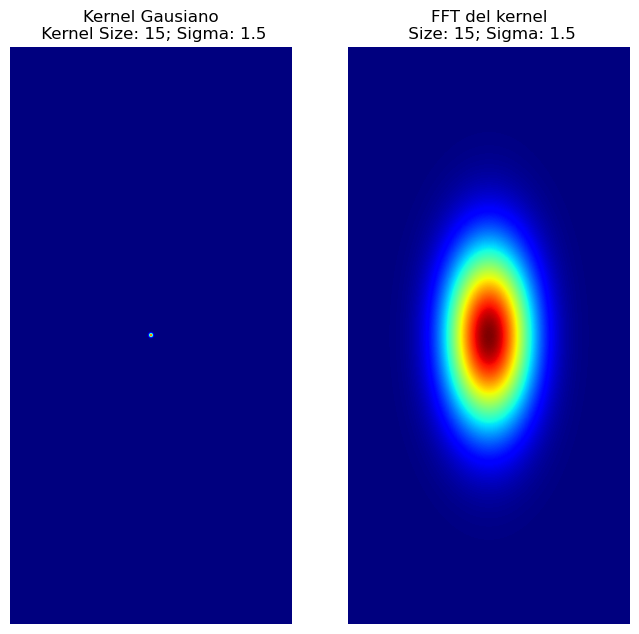

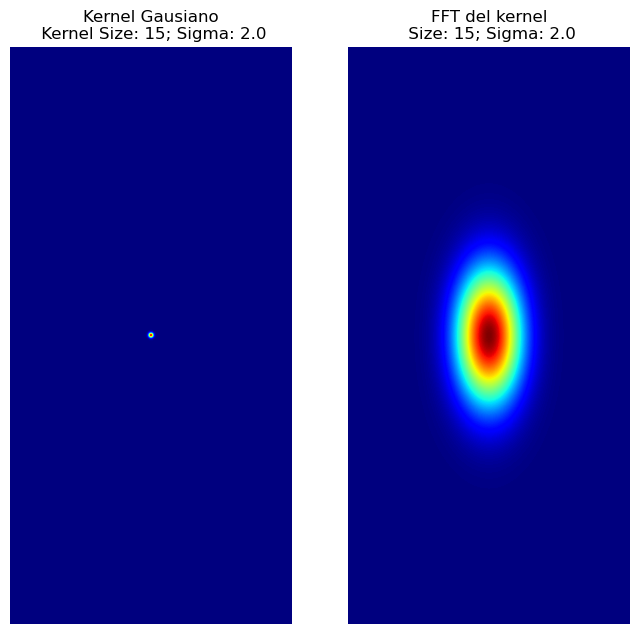

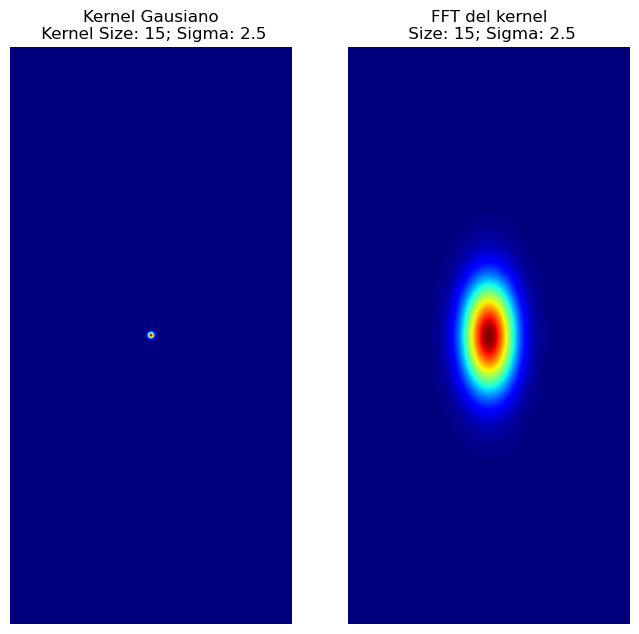

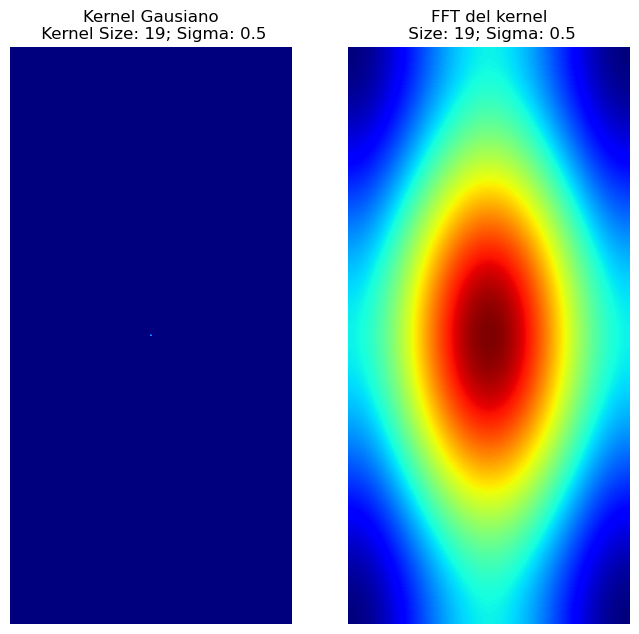

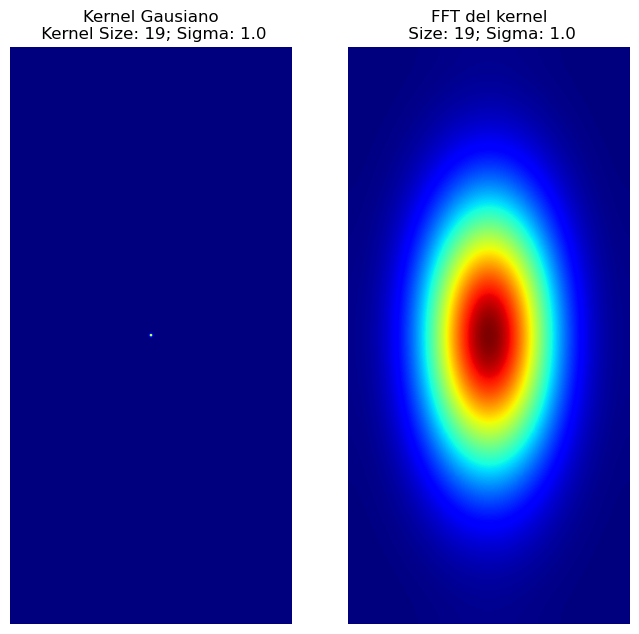

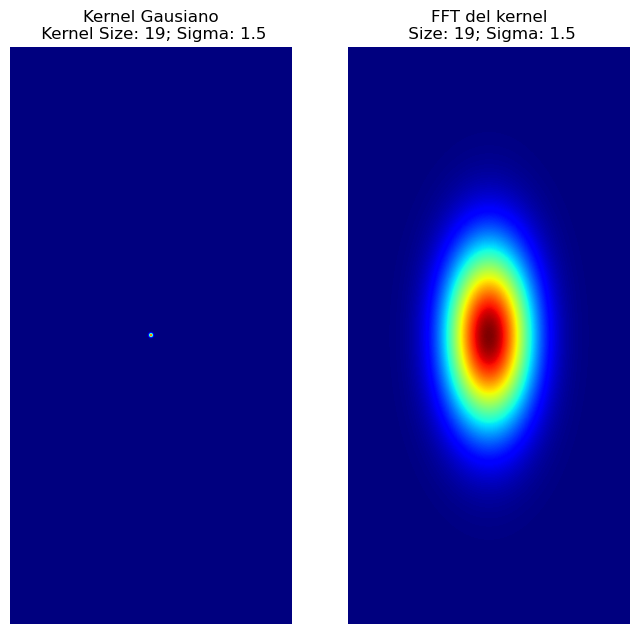

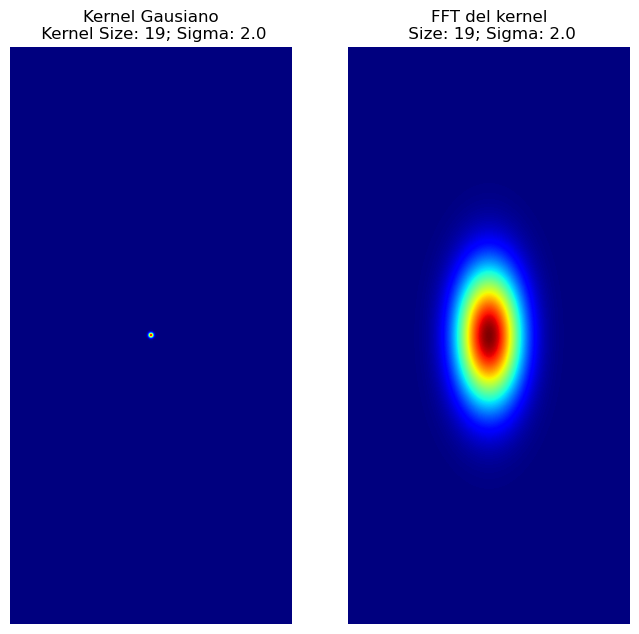

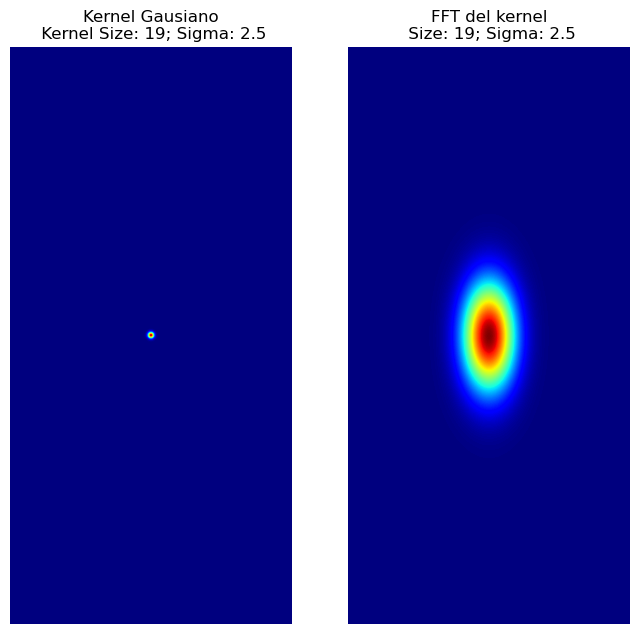

In [6]:
for i, size in enumerate(sizes):
    for j, sigma in enumerate(sigmas):      
        plt.figure(figsize=(8,8))
        plt.subplot(1,2,1)
        plt.axis('off')
        plt.title("Kernel Gausiano\n Kernel Size: {}; Sigma: {}".format(size, sigma))
        plt.imshow(kernels[i,j], cmap='jet')
        plt.subplot(1,2,2)
        plt.axis('off')
        plt.title("FFT del kernel\n Size: {}; Sigma: {}".format(size, sigma))
        tf_shifted = np.fft.fftshift(kernels_tf[i,j])
        plt.imshow(np.abs(tf_shifted), cmap='jet')

        cv.waitKey(0)

### Aplicar a una imagen

Text(0.5, 1.0, 'Desenfoque gausiano')

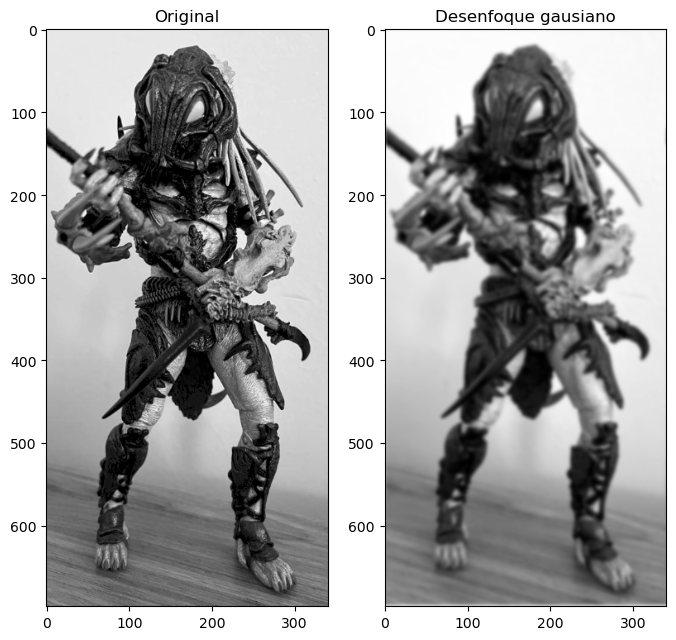

In [7]:
# Figura 'fft_alfa_pred.png'
img = cv.imread('fft_alfa_pred.png', cv.IMREAD_GRAYSCALE)
h, w = img.shape
img_fft = np.fft.fft2(img)

kernel, kernel_tf = create_gauss_filter(h, w, k_size=15, sigma=2)
filtered = img_fft * kernel_tf

img_gauss = np.fft.ifftshift(np.real(np.fft.ifft2(filtered)))


plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
# plt.axis('off')
plt.imshow(img, cmap='gray')
plt.title('Original')

plt.subplot(1,2,2)
# plt.axis('off')
plt.imshow(img_gauss, cmap='gray')
plt.title('Desenfoque gausiano')

Text(0.5, 1.0, 'Desenfoque gausiano')

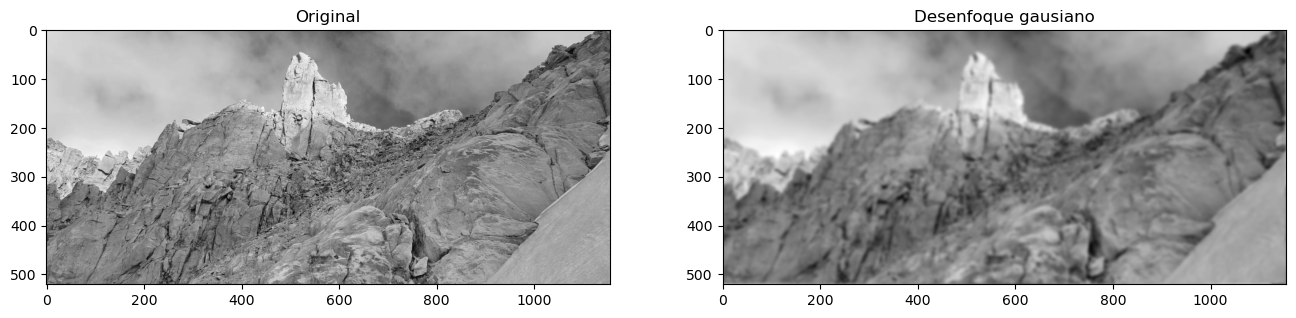

In [8]:
# Figura 'mountain.jpeg'
img = cv.imread('mountain.jpeg', cv.IMREAD_GRAYSCALE)
h, w = img.shape
img_fft = np.fft.fft2(img)

kernel, kernel_tf = create_gauss_filter(h, w, k_size=25, sigma=3)
filtered = img_fft * kernel_tf

img_gauss = np.fft.ifftshift(np.real(np.fft.ifft2(filtered)))


plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
# plt.axis('off')
plt.imshow(img, cmap='gray')
plt.title('Original')

plt.subplot(1,2,2)
# plt.axis('off')
plt.imshow(img_gauss, cmap='gray')
plt.title('Desenfoque gausiano')

## Inciso 2

## Inciso 3